In [40]:
# import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer 
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn import hmm
from matplotlib import cm
import os 
import warnings
import joblib
warnings.filterwarnings('ignore')

In [41]:
model = joblib.load('predict_market_regime_shift_by_HMM_model.joblib')
test_df = pd.read_csv('test_df.csv', index_col=0, parse_dates=True)

In [42]:
predicted_hidden_states = model.predict(test_df)
test_states = (pd.DataFrame(predicted_hidden_states, columns=['states'], index=test_df.index)
               .join(test_df, how='inner')
               .assign(SPX=test_df['CRSP Index File on the S&P 500 - Level of the S&P 500 Index'].cumsum())
               .reset_index(drop=False)
               .rename(columns={'index':'Date'}))

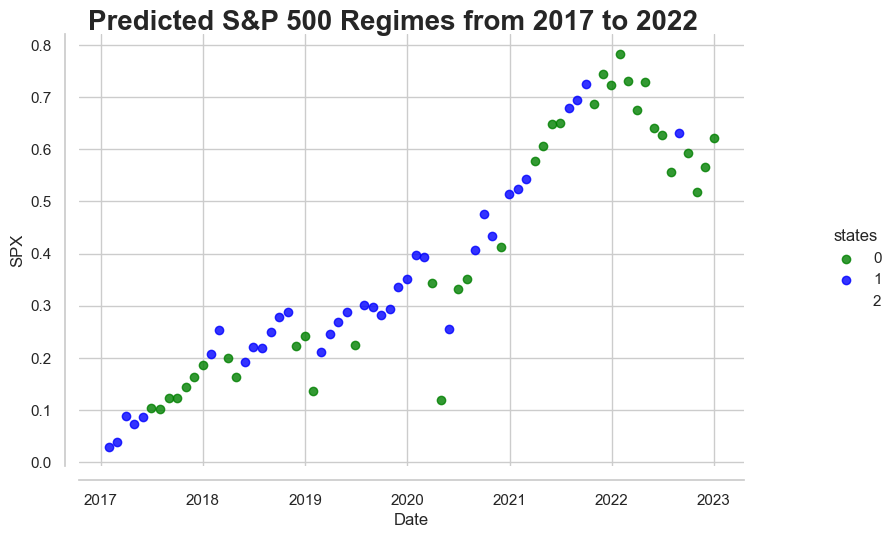

In [43]:
def plot_test_market_regime(states):
    custom_palette = {0: 'green', 1: 'blue', 2: 'red'}
    sns.set(style="whitegrid")
    order = [0, 1, 2]
    fg = sns.FacetGrid(data=states, hue='states', hue_order=order, palette=custom_palette, aspect=1.31)
    fg.map(plt.scatter, 'Date', "SPX", alpha=0.8)
    fg.add_legend()
    fg.fig.suptitle('Predicted S&P 500 Regimes from 2017 to 2022', fontsize=20, fontweight='bold')
    fg.fig.set_size_inches(10, 6)  
    sns.despine(offset=10)
    fg.savefig('test_df_on_S&P_500_Regimes.png', dpi=300)
    plt.show()

plot_test_market_regime(test_states)